### Assignment instructions
* Cluster the data

### Summary
* After applying KMeans and DBSCAN, the best clustering (measured in terms of Davies-Bouldin score) was a K-Means with 7 clusters. 

In [48]:
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Wholesale_customers_data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


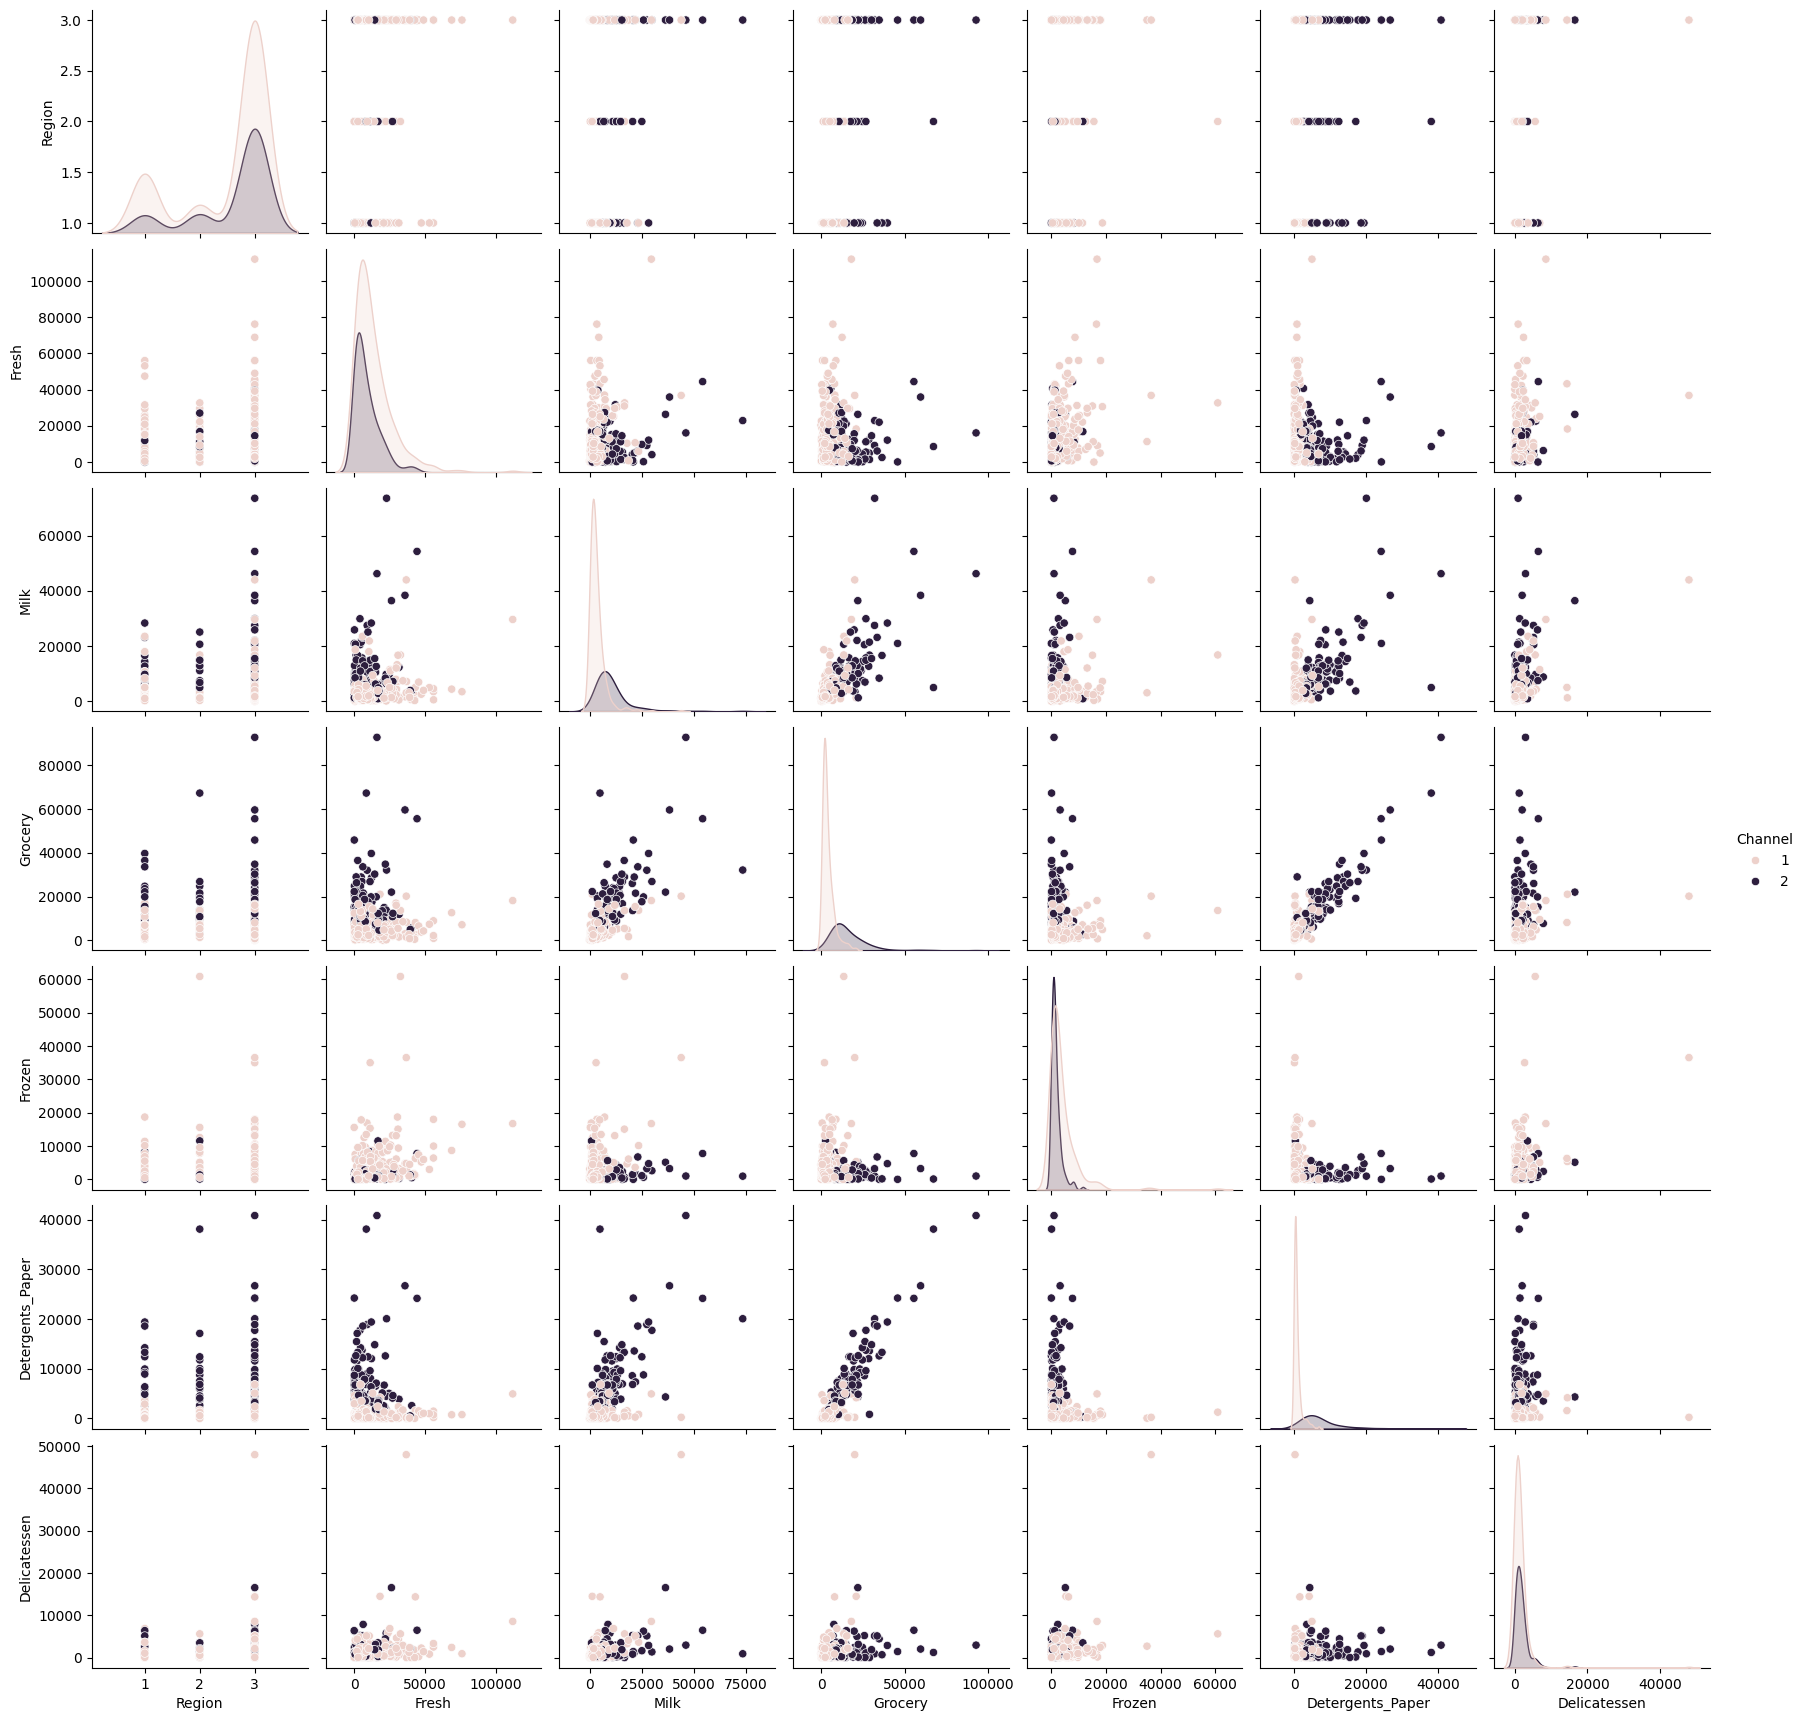

In [9]:
# correlations 
sns.pairplot(data, hue = 'Channel')

<Axes: >

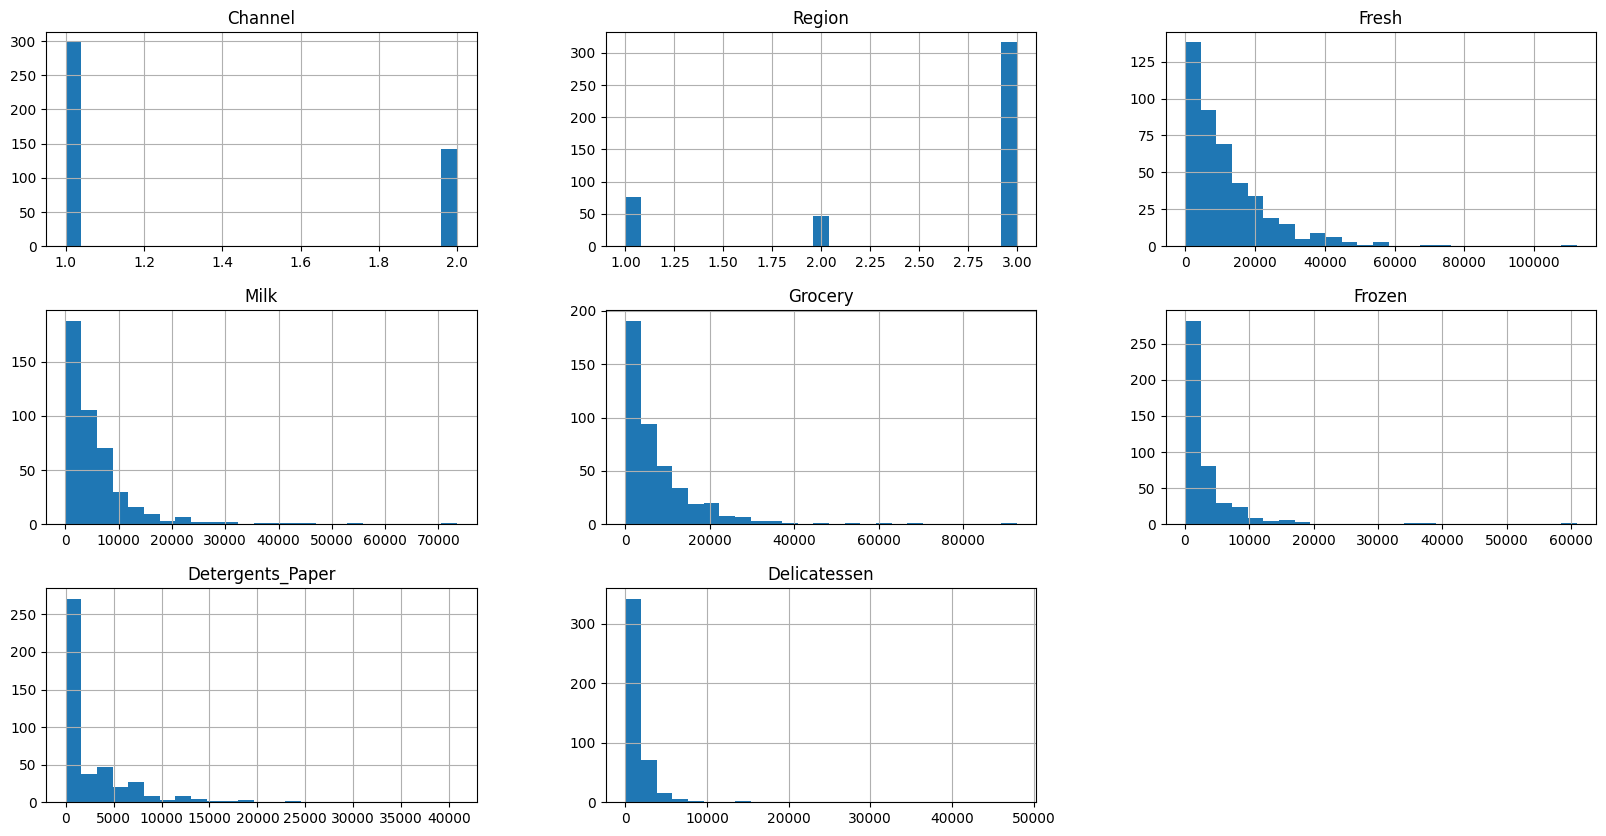

In [7]:
#histograms 

data.hist(bins = 25, figsize = (20,10))
    

In [16]:
scaler = StandardScaler()
data_norm= pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_norm.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### PCA
* After using PCA, there were 6 components that explain 95% of the variance in the data 
* Seeing 3 distinct clusters many of the bivariate PC plots, indicating 3 or 6 clusters? 

In [22]:
pca = PCA(n_components=6)
data_trans = pd.DataFrame(pca.fit_transform(data_norm))
print(pca.explained_variance_ratio_) # try taking out the last 2 components?
data_trans.head()

[0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354]


,0,1,2,3,4,5
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372


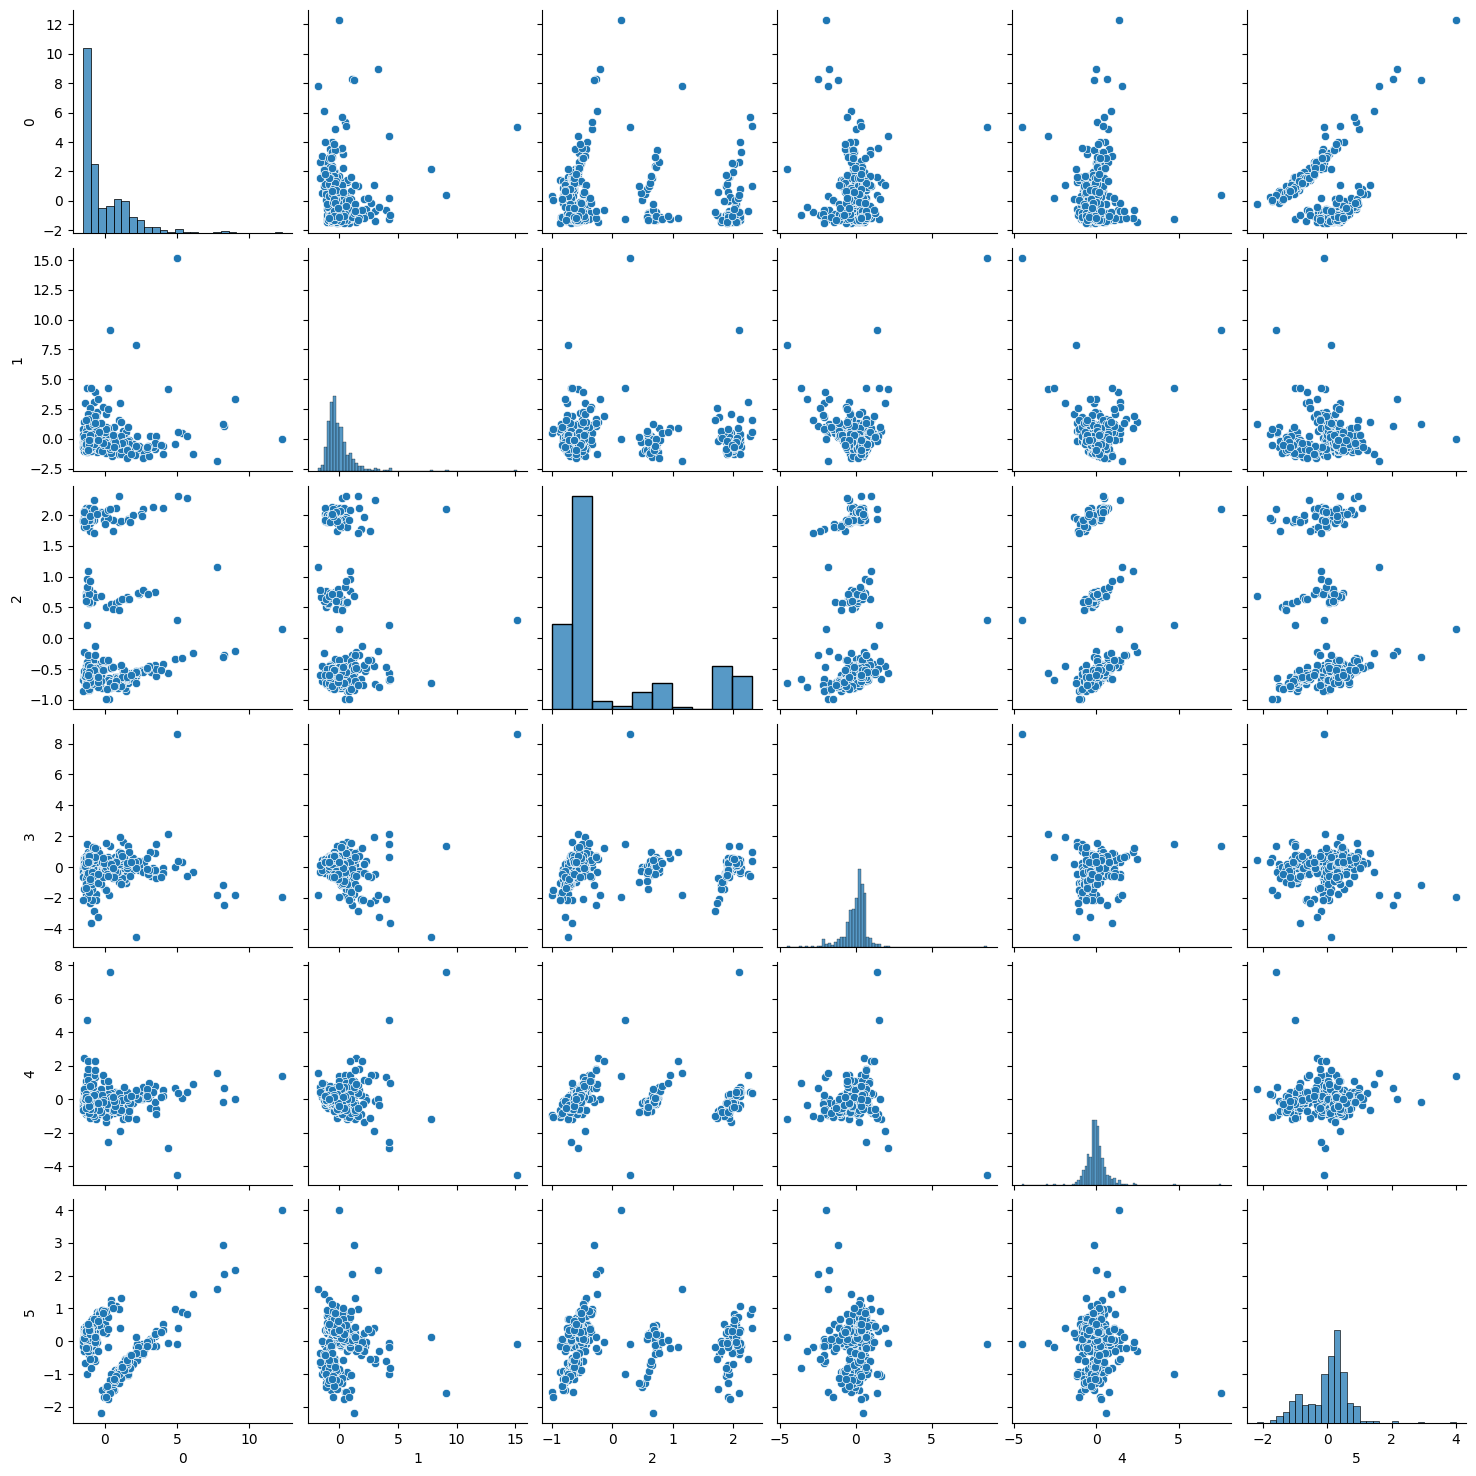

In [23]:
sns.pairplot(data_trans) # looks like there are 3 clusters 

### K Means
* use the elbow method to determine ideal number of clusters
* problem: the plot of inertia is pretty smooth and doesn't have a clear "elbow"
    * mathematically define a threshold for the decrease in inertia as cluster increases? 
    * tried on the original dataset too and saw same issue 
* solution: look at davies-bouldin score, measures the similarity between clusters -- lower dbs is better 
    * 7 clusters has the minimum dbs 
* When plotting the original data with 6 clusters, did not really see the clusters... bad approach? 

In [ ]:
#KMeans and elbow method 
inertia = {}
dbscores = {}
for k in range (2, 15):
    km = cluster.KMeans(n_clusters = k)
    km.fit(data_trans)
    dbs = davies_bouldin_score(data_trans, km.labels_)
    inertia[k] = km.inertia_
    dbscores[k] = dbs
    

Text(0.5, 0, 'clusters')

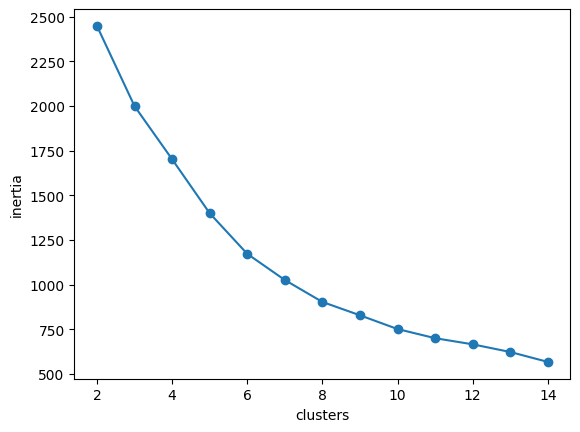

In [66]:
plt.plot(inertia.keys(), inertia.values(), marker = 'o', linestyle = '-')
plt.ylabel('inertia')
plt.xlabel('clusters')

Text(0.5, 0, 'clusters')

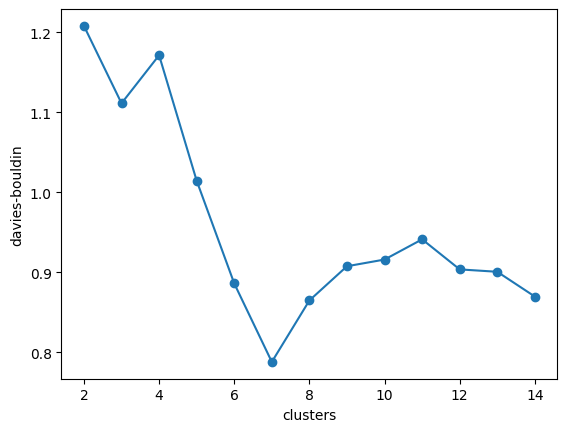

In [65]:
plt.plot(dbscores.keys(), dbscores.values(), marker = 'o', linestyle = '-')
plt.ylabel('davies-bouldin')
plt.xlabel('clusters')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


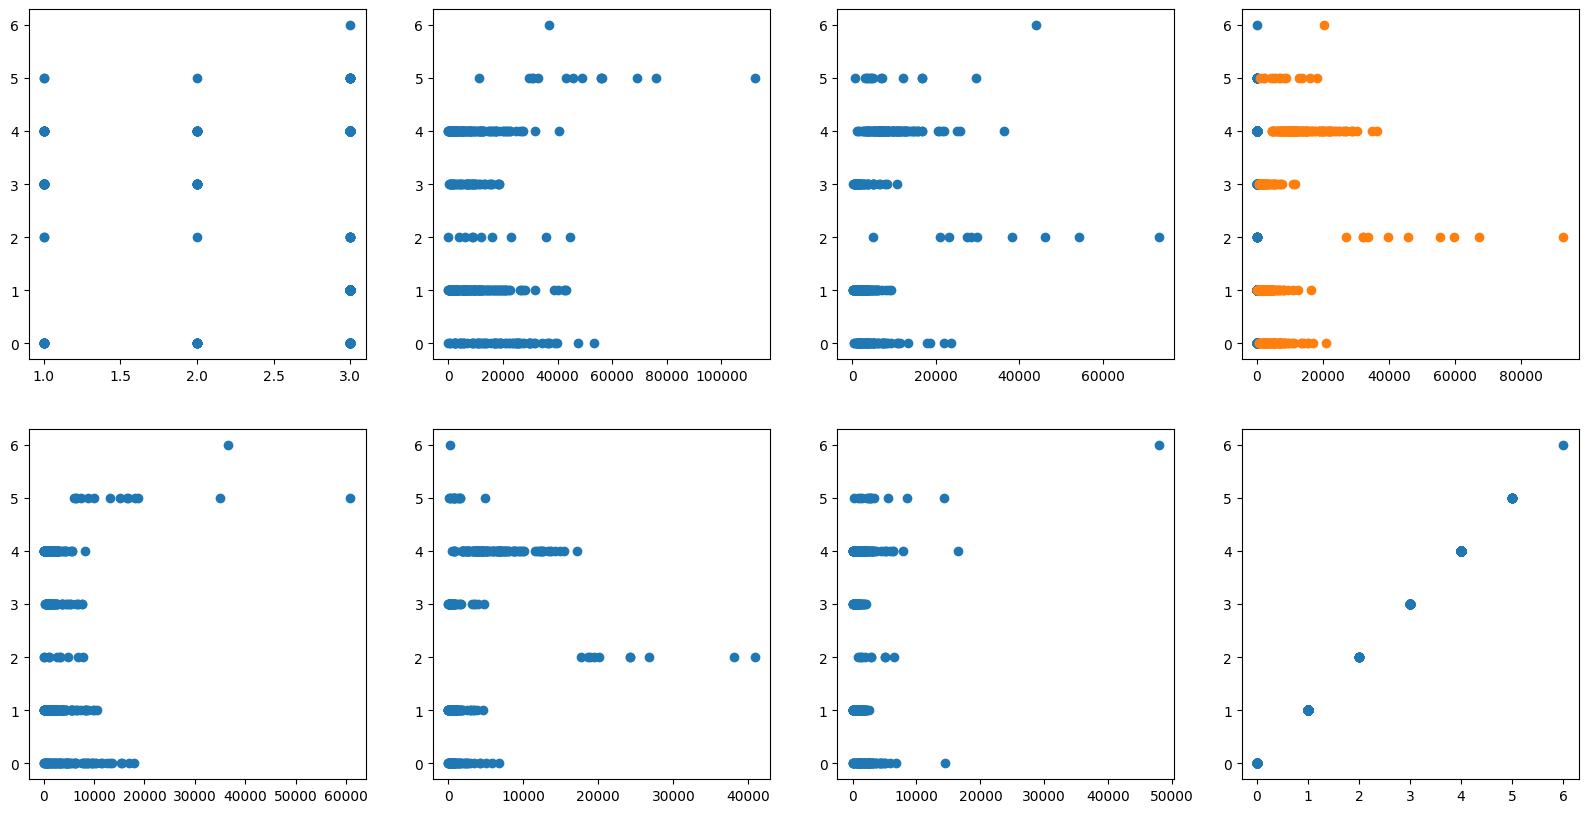

In [72]:
#looking at cluster distributions by variable -- not really seeing much here
data['cluster'] = cluster.KMeans(n_clusters= 7).fit(data_norm).labels_
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
for x in range(9):
    r = 0 if x < 5 else 1
    c = x % 4 - 1
    ax[r,c].scatter(data[data.columns[x]], data['cluster'])

In [ ]:
#trying with normalized data 
inertia = {}
for k in range (2, 15):
    km = cluster.KMeans(n_clusters = k)
    km.fit(data_norm)
    inertia[k] = km.inertia_
plt.plot(inertia.keys(), inertia.values(), marker = 'o', linestyle = '-')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


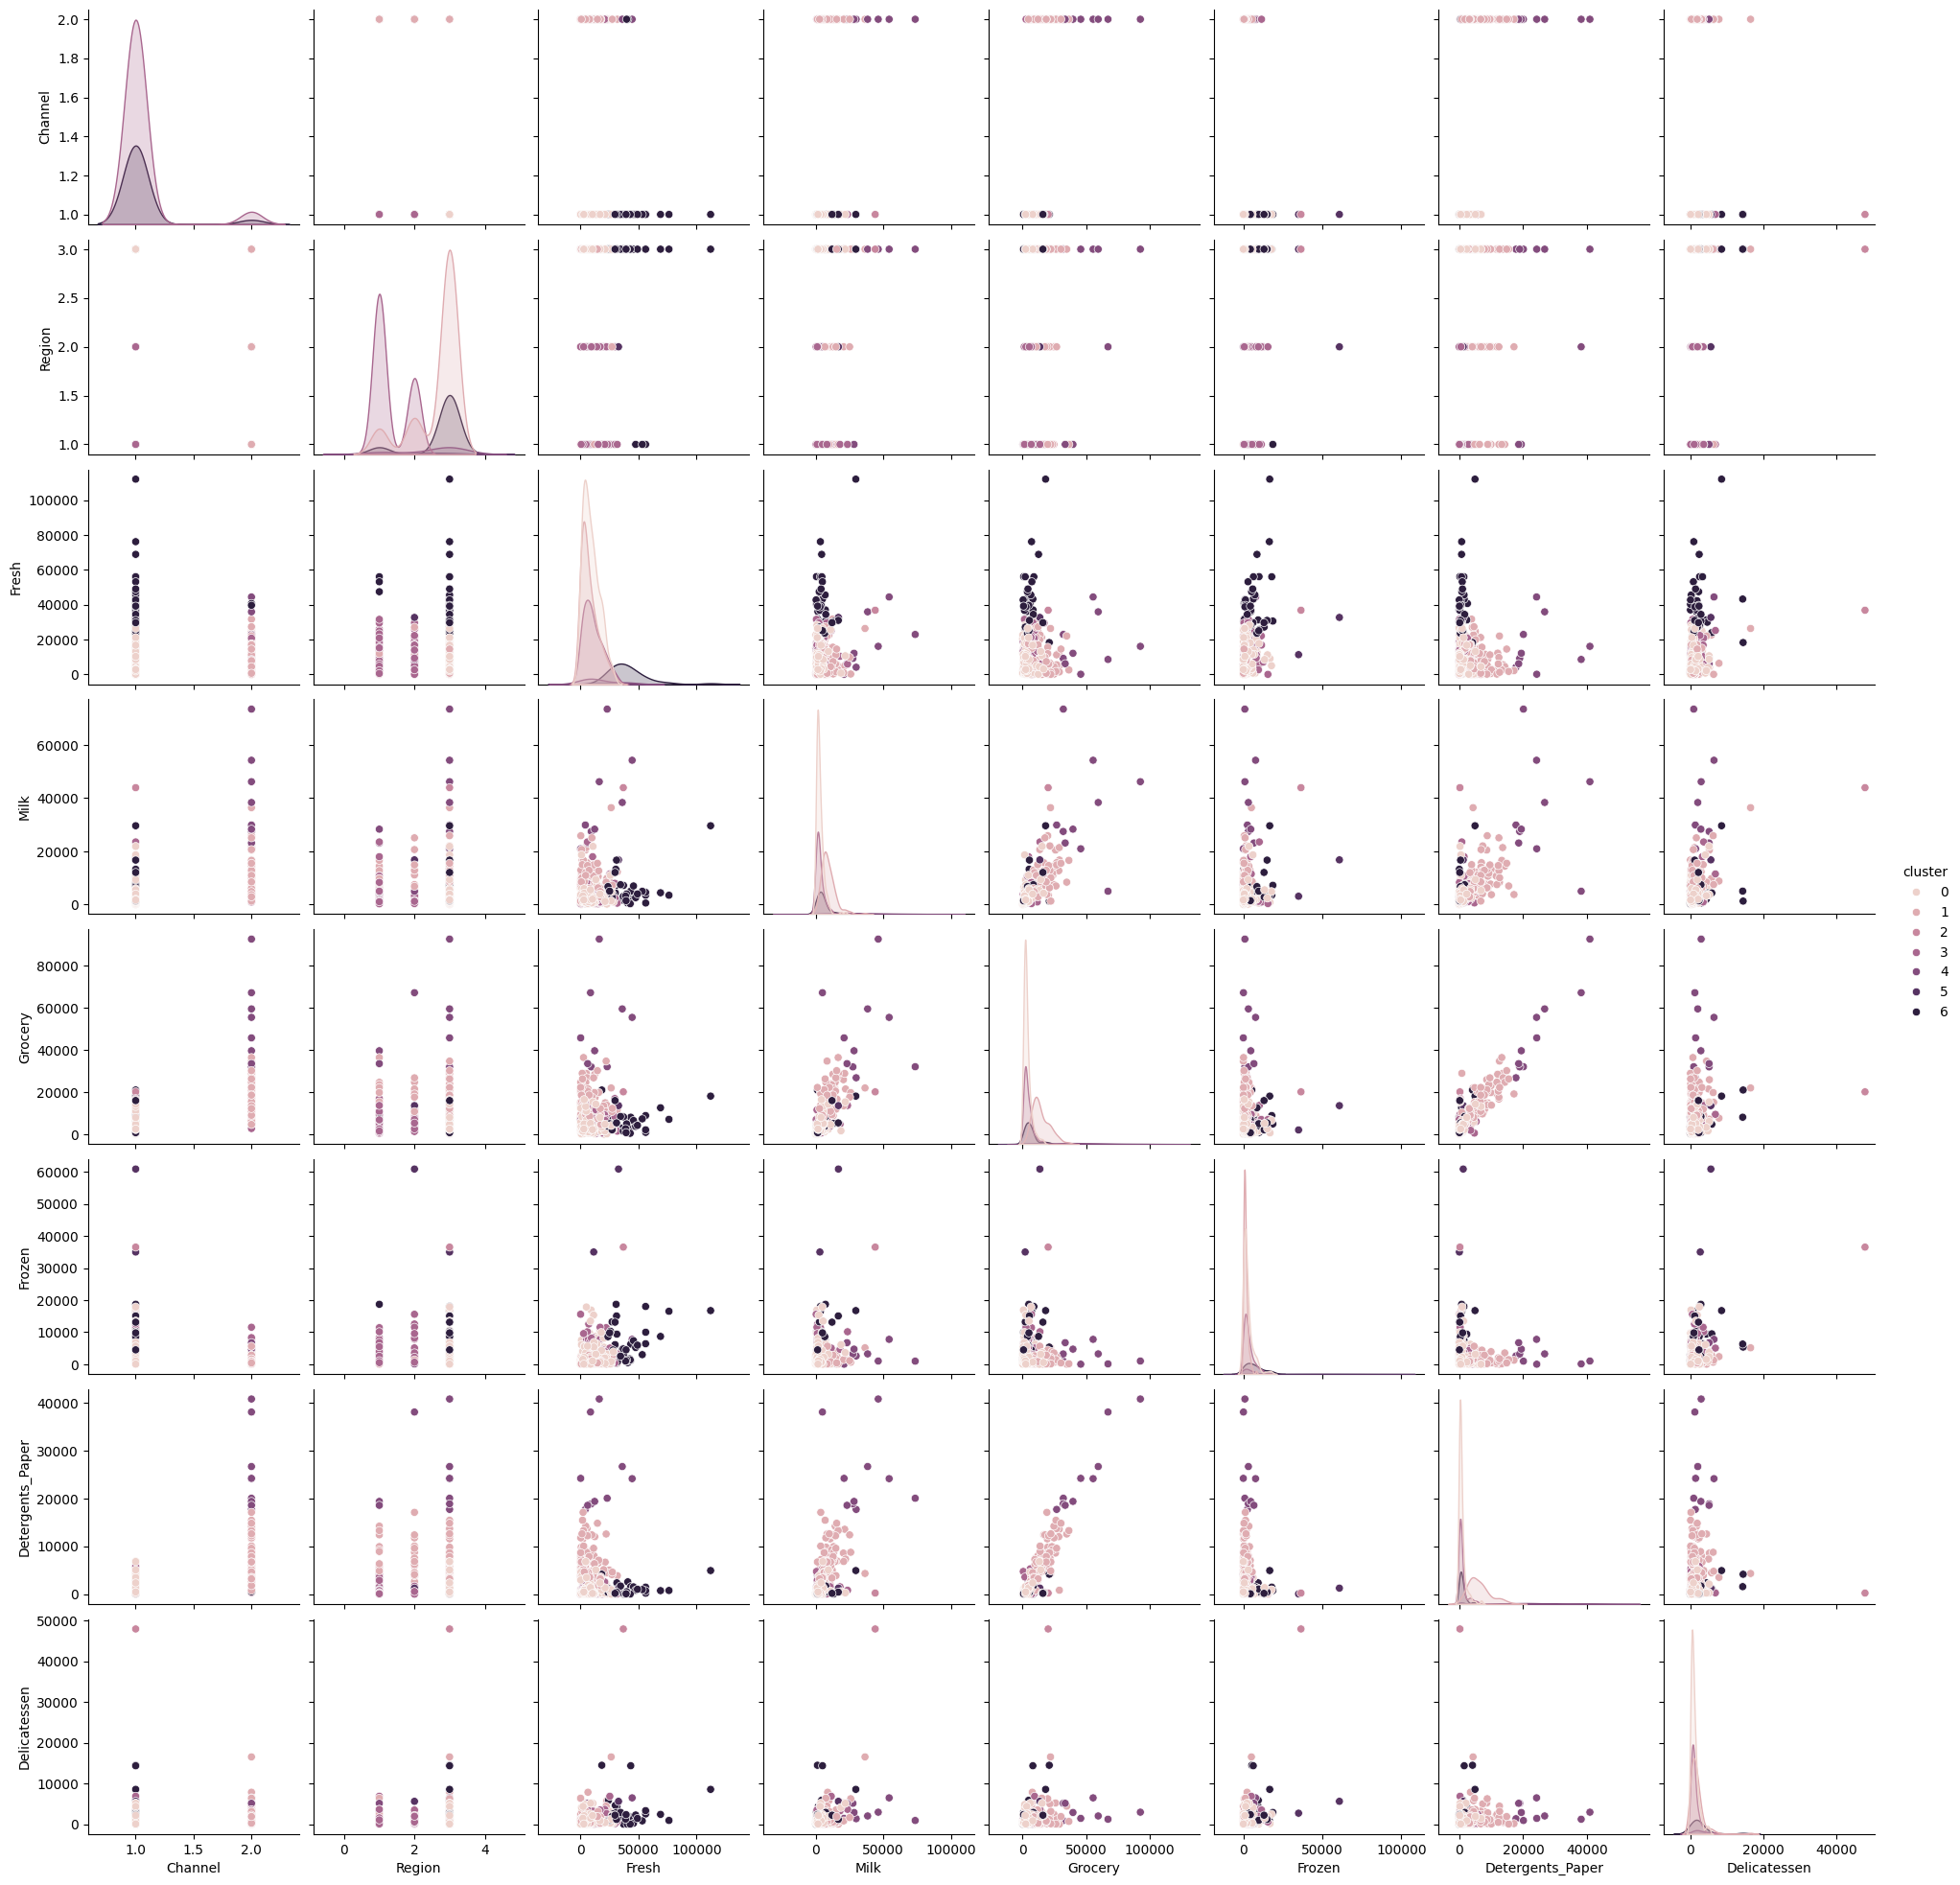

In [73]:
#looking  for clusters using best model
data['cluster'] = cluster.KMeans(n_clusters= 7).fit(data_trans).labels_
sns.pairplot(data, hue = 'cluster')

### DBScan 
* DBScan came up with 9 different categories -- overfit??
* Did not perform as well -- dbs = 1.55

1.5482960726042532


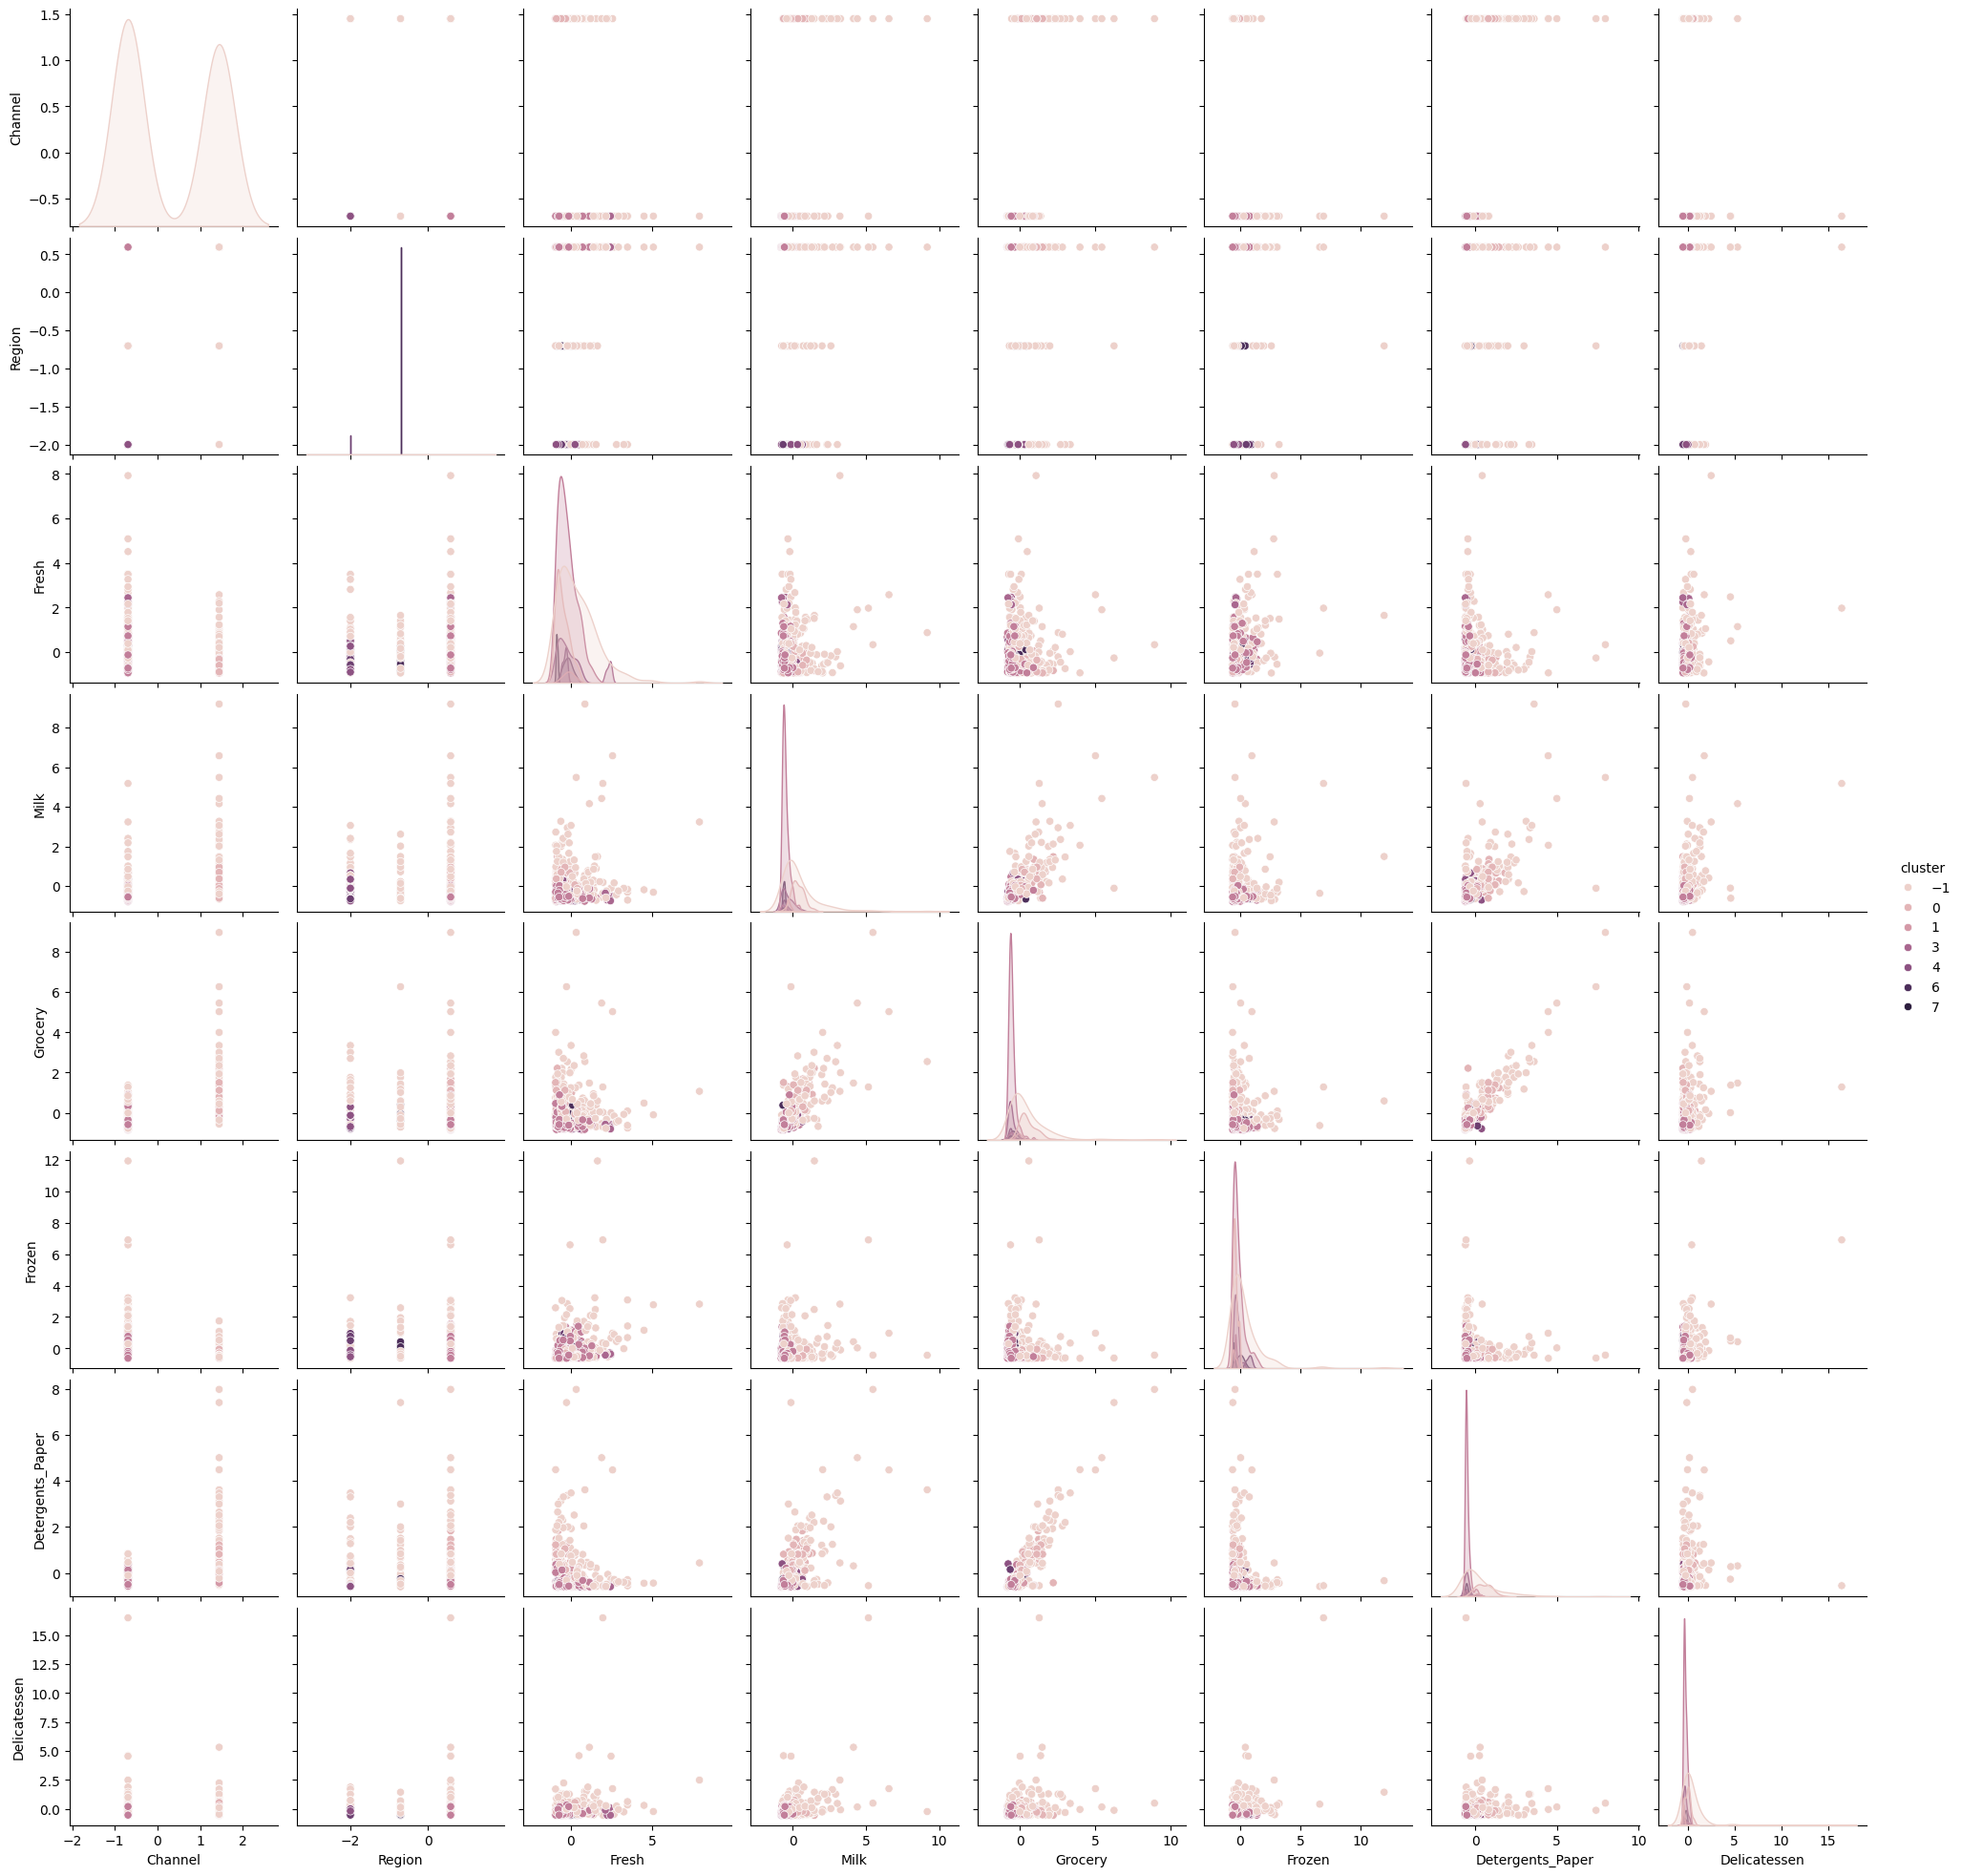

In [64]:
db = cluster.DBSCAN()
db.fit(data_trans)
dbs = davies_bouldin_score(data_norm, db.labels_)
data_norm['cluster'] = db.labels_
sns.pairplot(data_norm, hue = 'cluster')
print(dbs)

0.0036554292805820554